In [1]:
%load_ext autoreload
%autoreload 2
    
import src.multiagent_mpc as mpc
import src.traffic_world as tw
import src.car_plotting_multiple as cmplot
import glob
import argparse
import json
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

## IDM Seed 2

In [3]:
logs = glob.glob('/home/nbuckman/mpc_results/idm_3_4_longer/*')
print(logs)

['/home/nbuckman/mpc_results/idm_3_4_longer/1ad0-e9g4-20210304-232908', '/home/nbuckman/mpc_results/idm_3_4_longer/dh26-6d9a-20210304-232912', '/home/nbuckman/mpc_results/idm_3_4_longer/d64h-f15h-20210304-232940', '/home/nbuckman/mpc_results/idm_3_4_longer/8g88-94b7-20210304-233007', '/home/nbuckman/mpc_results/idm_3_4_longer/1g11-b770-20210304-233011', '/home/nbuckman/mpc_results/idm_3_4_longer/2afg-ca6c-20210304-232932', '/home/nbuckman/mpc_results/idm_3_4_longer/aae7-ch90-20210304-233018', '/home/nbuckman/mpc_results/idm_3_4_longer/h79c-f8f4-20210304-232920', '/home/nbuckman/mpc_results/idm_3_4_longer/9g19-76da-20210304-233025', '/home/nbuckman/mpc_results/idm_3_4_longer/d573-82bb-20210304-233031', '/home/nbuckman/mpc_results/idm_3_4_longer/4931-1e29-20210304-233014', '/home/nbuckman/mpc_results/idm_3_4_longer/0g6c-d270-20210304-233021', '/home/nbuckman/mpc_results/idm_3_4_longer/2hb2-fd63-20210304-232947', '/home/nbuckman/mpc_results/idm_3_4_longer/hacc-944g-20210304-232916', '/hom

In [4]:
for LOG_DIRECTORY in logs:
    # Arguments
    camera_speed = -1
    shape = 'image'
    svo_colors = 1
    n_workers = 8
    fps = 16
    LOG_DIRECTORY = LOG_DIRECTORY + '/'
#     LOG_DIRECTORY = '/home/nbuckman/mpc_results/0h2e-dd2f-20210304-214006/'

    VEHICLE_PATH = LOG_DIRECTORY + 'ambulance.p'
    OTHER_VEHICLE_PATH = LOG_DIRECTORY + 'other_vehicles.p'
    TRAJ_PATH = LOG_DIRECTORY + 'trajectories.npy'
    PARAMS_PATH = LOG_DIRECTORY + 'params.json'
    WORLD_PATH = LOG_DIRECTORY + 'world.p'


    trajectory = np.load(open(TRAJ_PATH,'rb'))
    xamb = trajectory[0, :, :]
    xothers = trajectory[1:, :, :]

    log_string = LOG_DIRECTORY.split('/')[-2]
    VIDEO_OUT_PATH = LOG_DIRECTORY + log_string + '.mp4'


    # generate pictures for animation


    # Load data
    with open(PARAMS_PATH) as fp:
        params = json.load(fp)

    response_vehicle = pickle.load(open(VEHICLE_PATH,'rb'))
    other_vehicles = pickle.load(open(OTHER_VEHICLE_PATH,'rb')) #TODO:  save all the vehicles in one file
    #
    try:
        world = pickle.load(open(WORLD_PATH,'rb'))
    except FileNotFoundError:
        WORLD_PATH = LOG_DIRECTORY + 'data/world.p'
        world = pickle.load(open(WORLD_PATH,'rb'))

#     print("k_lat", other_vehicles[0].k_lat)
    print("seed", params['seed'])
    # Prep a temp image directory


    if camera_speed == -1:
        camera_speed = np.mean(xamb[4,:])

    if svo_colors == 1:
        svo = []
        for veh in other_vehicles:
            if hasattr(veh, "theta_ij"):
                svo += [veh.theta_ij[-1]]
            else:
                svo += [veh.theta_iamb]
        car_colors = ['r' for i in range(len(svo))]
        for i in range(len(svo)):
            if svo[i] < np.pi/8.0:
                car_colors[i] = 'red'
            elif np.pi/8 <= svo[i] <= 3*np.pi/8.0:
                car_colors[i] = 'purple'
            elif np.pi/8 <= svo[i] <= np.pi/2.0:
                car_colors[i] = 'blue'
    else:
        car_colors = None



    IMG_DIR = LOG_DIRECTORY + 'temp/'
    print("Saving photos to %s..."%(IMG_DIR))

    os.makedirs(IMG_DIR, exist_ok=True)    
    for f in glob.glob(os.path.join(IMG_DIR, "*.png")):
        os.remove(f)
    try:
        os.remove(VIDEO_OUT_PATH)
    except OSError:
        pass

    cmplot.plot_cars(world, response_vehicle, xamb, [xothers[i,:,:] for i in range(xothers.shape[0])],
                    IMG_DIR, shape, camera_speed, None, car_colors, n_workers)              

    outfile = cmplot.animate(IMG_DIR, VIDEO_OUT_PATH, fps)

    vid_directory = '/home/nbuckman/mpc-vids/'
    cmd = 'cp %s %s'%(VIDEO_OUT_PATH, vid_directory)
    os.system(cmd)


#     from IPython.display import Video

#     Video(outfile, embed=True, width=1024)

seed 8
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/1ad0-e9g4-20210304-232908/temp/...



seed 7
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/dh26-6d9a-20210304-232912/temp/...



seed 1
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/d64h-f15h-20210304-232940/temp/...



seed 2
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/8g88-94b7-20210304-233007/temp/...



seed 3
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/1g11-b770-20210304-233011/temp/...



seed 3
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/2afg-ca6c-20210304-232932/temp/...



seed 5
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/aae7-ch90-20210304-233018/temp/...



seed 5
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/h79c-f8f4-20210304-232920/temp/...



seed 7
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/9g19-76da-20210304-233025/temp/...



seed 8
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/d573-82bb-20210304-233031/temp/...



seed 4
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/4931-1e29-20210304-233014/temp/...



seed 6
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/0g6c-d270-20210304-233021/temp/...



seed 0
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/2hb2-fd63-20210304-232947/temp/...



seed 6
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/hacc-944g-20210304-232916/temp/...



seed 9
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/3acb-3ebh-20210304-232904/temp/...



seed 1
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/4h6e-1b1c-20210304-233003/temp/...



seed 4
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/18hb-32f2-20210304-232926/temp/...



seed 2
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/h86a-09c0-20210304-232936/temp/...



seed 0
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/aa6g-25aa-20210304-233000/temp/...



seed 9
Saving photos to /home/nbuckman/mpc_results/idm_3_4_longer/a11d-75f2-20210304-233036/temp/...


## Analysis

In [9]:
data_x = dict()
for seed in range(10):
    data_x[seed] = dict()

In [11]:
for LOG_DIRECTORY in logs:
    # Arguments
    camera_speed = -1
    shape = 'image'
    svo_colors = 1
    n_workers = 8
    fps = 16
    LOG_DIRECTORY = LOG_DIRECTORY + '/'
#     LOG_DIRECTORY = '/home/nbuckman/mpc_results/0h2e-dd2f-20210304-214006/'

    VEHICLE_PATH = LOG_DIRECTORY + 'ambulance.p'
    OTHER_VEHICLE_PATH = LOG_DIRECTORY + 'other_vehicles.p'
    TRAJ_PATH = LOG_DIRECTORY + 'trajectories.npy'
    PARAMS_PATH = LOG_DIRECTORY + 'params.json'
    WORLD_PATH = LOG_DIRECTORY + 'world.p'


    trajectory = np.load(open(TRAJ_PATH,'rb'))
    xamb = trajectory[0, :, :]
    xothers = trajectory[1:, :, :]

    log_string = LOG_DIRECTORY.split('/')[-2]
    VIDEO_OUT_PATH = LOG_DIRECTORY + log_string + '.mp4'


    # generate pictures for animation


    # Load data
    with open(PARAMS_PATH) as fp:
        params = json.load(fp)

    delta_x = xamb[0,-1] - xamb[0,0]
    data_x[params["seed"]][params["svo_theta"]] = delta_x

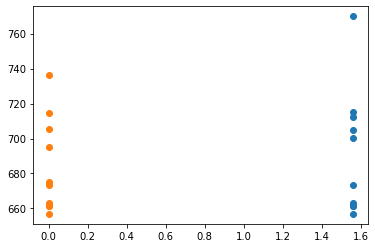

In [20]:
for svo in data_x[0]:
    plt.plot([svo for seed in data_x],[data_x[seed][svo] for seed in data_x],'o')

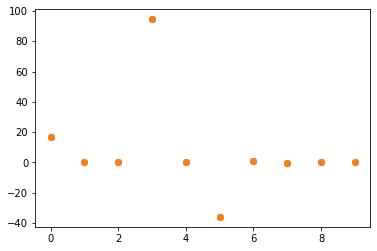

In [21]:
for svo in data_x[0]:
    plt.plot([data_x[seed][1.56] - data_x[seed][0.0] for seed in data_x],'o')

In [22]:
np.median([data_x[seed][1.56] - data_x[seed][0.0] for seed in data_x])

0.0

In [23]:
np.mean([data_x[seed][1.56] - data_x[seed][0.0] for seed in data_x])

7.633916521435049